# Replication & Repair

..


In [11]:
%config InlineBackend.figure_format = 'svg'
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib.patches import Ellipse, Circle

# Run and plot a simulation, based on the provided parameters
def simulate_replication(reps = 2, total_time = 100, loss_prob = 0.1, check_period = 1, rng_seed = 10):
    # Plot setup:
    fig, ax=plt.subplots(figsize=[10,reps])
    ax.set_xlim([0,total_time])
    ax.set_ylim([-1, reps])

    ax.set_yticks(range(0, reps))
    ylabels = []
    for r in range(reps):
        ylabels.append('Replica %i' % (r + 1))
    ax.set_yticklabels(ylabels)

    # No x-axis ticks
    ax.set_xticks([0, total_time])
    #ax.set_xticks(range(0,20))
    ax.set_xlabel('Time')

    def add_line(l, c='k'):
        lc = LineCollection([l], color=c, zorder=5.0)
        ax.add_collection(lc)

    def add_dot(pos, c='b'):
        plt.plot(pos[0], pos[1], marker='o', markersize=4, color=c, zorder=10.0)

    def run():
        # Reset the random number generator:
        np.random.seed(rng_seed)

        # Storage for current trajectories:
        lines = []
        for r in range(reps):
            lines.append([])
        # Initial state - all replicated:
        state = [1] * reps

        # Loop over time:
        for t in range(0, total_time + 1):

            # Record current state:
            for r in range(reps):
                # If still alive, record it:
                if state[r]:
                    lines[r].append([t,r])

            # Damage:
            for r in range(reps):
                # Decide if this replica gets damaged:
                if state[r] and np.random.uniform() < loss_prob:
                    # Add a loss indicator:
                    add_dot((t,r), c='r')
                    # Update state:
                    state[r] = 0
                    # Plot the trajectory:
                    if len(lines[r]) > 0:
                        add_line(lines[r])
                    lines[r] = []

            # Periodically check and replicate:
            if t%check_period == 0:
                for r in range(reps):
                    # Attempt to repair any damage:
                    if not state[r]:
                        replist = list(range(reps))
                        np.random.shuffle(replist)
                        for r2 in replist:
                            if state[r2]:
                                # Record replication:
                                state[r] = state[r2]
                                # Show the preceding line and indicator:
                                add_line([[t,r2],[t+1,r]], 'b')
                                add_dot((t+1,r))
                                # No need to check other replicas:
                                break

            # Add final trajectories:
            for r in range(reps):
                # Plot the trajectory:
                if len(lines[r]) > 1:
                    add_line(lines[r])

    # Run the simulation:
    run()

    # Show the result:
    plt.show()
    
    # Return the figure, for replotting elsewhere if needed:
    return fig

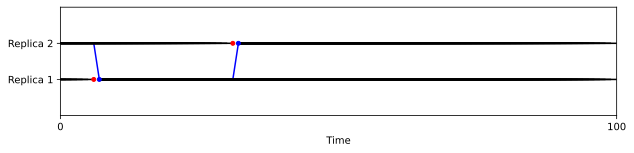

In [12]:
fig = simulate_replication(reps=2, loss_prob=0.01, rng_seed=10)

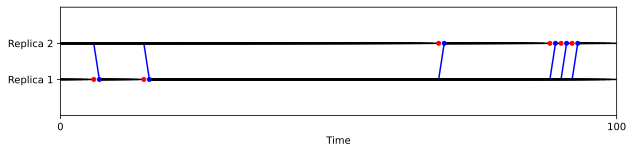

In [10]:
fig = simulate_replication(reps=2, loss_prob=0.02, rng_seed=10)

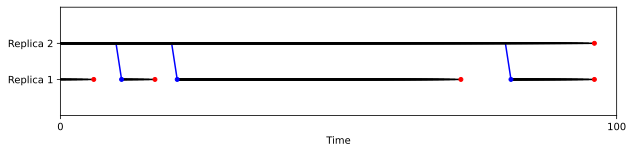

In [15]:
fig = simulate_replication(reps=2, loss_prob=0.02, check_period=10, rng_seed=10)

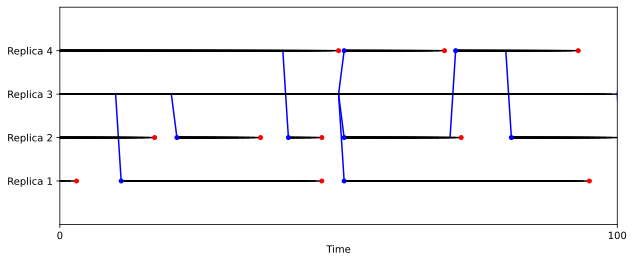

In [14]:
fig = simulate_replication(reps=4, loss_prob=0.02, check_period=10, rng_seed=10)